<a href="https://colab.research.google.com/github/FerrazThales/AirbnbParis/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?

---

# A digitalização da economia e as Fraudes em Cartões de Crédito

*Devido ao isolamento social provocado pela pandemia do **COVID-19** houve um aumento considerável das compras realizadas em **e-commerce**. Com isso, também **aumentaram** significativamente as tentativas de fraude em cartões de crédito.  As categorias de produtos mais requisitados pelos **fraudadores** são: celulares, produtos eletrônicos e games.*

*Se comparado ao primeiro semestre de 2020, houve um **aumento** de quase 33% de tentativas de fraude no mesmo período do ano de 2021.Além disso, os **valores** envolvidos neste tipo de transação fraudulenta também aumentou em quase 40% entre os períodos comparados. [Clique aqui para ter mais detalhes.](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)*

*Dentro deste contexto, iremos realizar um projeto em que abordaremos o problema das fraudes em cartões de crédito, uma das principais preocupações das **instituições financeiras** (como bancos e fintechs). Apenas no Brasil, [6 em cada 10 pessoas foram vítimas de fraudes financeiras](https://noticias.r7.com/economia/economize/6-em-cada-10-pessoas-foram-vitimas-de-fraude-financeira-em-12-meses-28062021). Este número representa cerca de 17 milhões de pessoas cujos dados foram obtidos principalmente por técnicas de [phishing](https://br.malwarebytes.com/phishing/#:~:text=Phishing%20%C3%A9%20o%20crime%20de,phishing%20%C3%A9%20a%20mais%20comum.) ou [engenharia social](https://www.kaspersky.com.br/resource-center/definitions/what-is-social-engineering).*

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/homem-hacker-no-laptop_144627-25527.jpg" width="50%"></p>


*Além das fraudes realizadas por criminosos, existem as transações consideradas como [falsos positivos](https://b2egroup.com.br/2021/02/18/falsos-positivos-o-que-sao/), ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu **cartão bloqueado** preventivamente - o que provavelmente gerou estresse e **constrangimento**.*

* terminar daqui para baixo

*Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em Data Science.*

*Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.*

# Dicas para evitar ser vítima de fraudes no ambiente digital

*O aumento do número de fraudes levou o governo federal e outras entidades privadas a lançar uma campanha chamada [#FiqueEsperto](https://fe.seg.br/) para alertar os usuários da internet sobre a segurança e tentativas de golpe.*

* terminar

## Importando os Dados -- explicar melhor o data set (ver o q está escrito no kaggle)

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

* o que é pca

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Dicionários da Base de Dados

* **Time**: *Número de segundos decorridos entre a primeira transação registrada e a transação analisada*
* As variáveis **n** são referentes as que foram transformadas pelo método PCA:  \begin{align}V_n \text{ onde n ∈ aos naturais e n <29} \end{align}

* **Amount** : *Quantidade de dinheiro utilizado na transação*
* **Class**: *1 representa as transações fraudulentas e 0 as transações não-fraudulentas*

In [89]:
# importar os dados e trabalhar com o data frame
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline

#retirando warnings do código
import warnings
warnings.filterwarnings('ignore')

#normalização dos dados
from sklearn.preprocessing import StandardScaler

#algoritmo para under sampling (balanceamento dos dados)
from imblearn.under_sampling import RandomUnderSampler

#separar os dados em treino e teste
from sklearn.model_selection import train_test_split

#plotar a matriz de confusao
from sklearn.metrics import plot_confusion_matrix

#modelo de regressão logística
from sklearn.linear_model import LogisticRegression

#modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#plotar arvore de decisao
from sklearn.tree import plot_tree

#importando o relatorio para modelos de classificacao
from sklearn.metrics import classification_report

In [2]:
#endereco dos dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

*Com os dados importados para dentro de uma estrutura **Dataframe** - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, podemos iniciar nossa **análise** exploratória dos dados a fim de preparar um modelo de **Machine Learning**.*

## Análise Exploratória

* colocar texto sobre a importãncia da análise exploratória antes de fazer os modelos de machine learning

Abordar tópicos/informações como:

* Plotar uma matriz de correlação

### Visualizando as 5 primeiras entradas

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


explicar pca novamente

### Tipo de Dados do dataset

In [109]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

reparar que a class está em int

### Resumo estatístico da base de dados

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


texto para explicar o describe

### Verificando se há valores ausentes

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

texto explicando que neste dataset não há valores vazios

### Avaliando o balanceamento da base de dados

In [6]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 6000,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

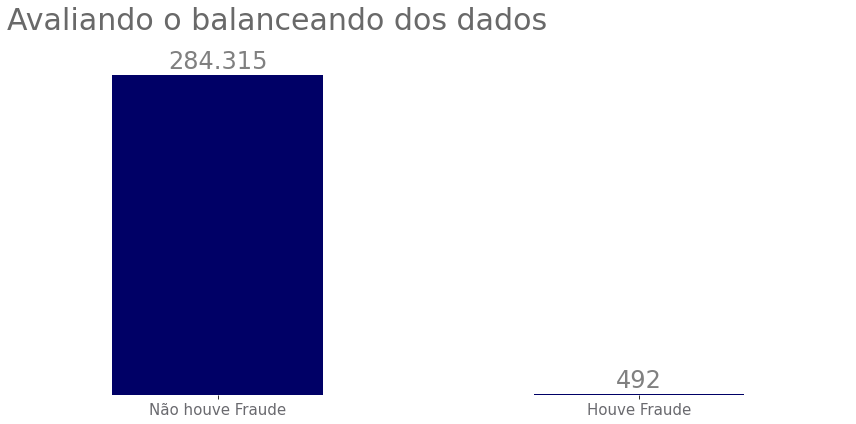

In [7]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,6))

#pegando a contagem de valores da variável Class
df.Class.value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando o balanceando dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels(df.Class,df.Class.value_counts())


#plotando o gráfico
plt.tight_layout();

In [8]:
#avaliando quanto de fraude houve pela porcentagem
nao_fraude = df[df.Class == 1].shape[0] / df.Class.shape[0]
print('Os dados que são provenientes de fraudes representam cerca de: {:.2f}% de nossa base.'.format(nao_fraude*100))

Os dados que são provenientes de fraudes representam cerca de: 0.17% de nossa base.


explicando o não balanceamento dos dados

### Analisando os dados através de histogramas

#### Histograma da Variável Time

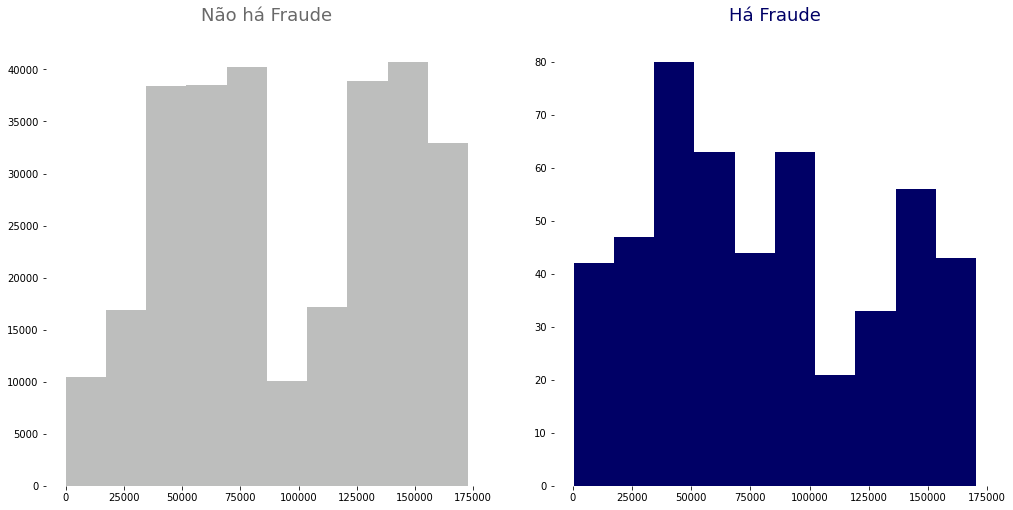

In [9]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável time quando não há fraude
ax[0].hist(df['Time'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável time quando não há fraude
ax[1].hist(df['Time'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})


#plotando o gráfico
plt.tight_layout(pad=4.0);

texto sobre este histograma

#### Histograma da Variável Amount

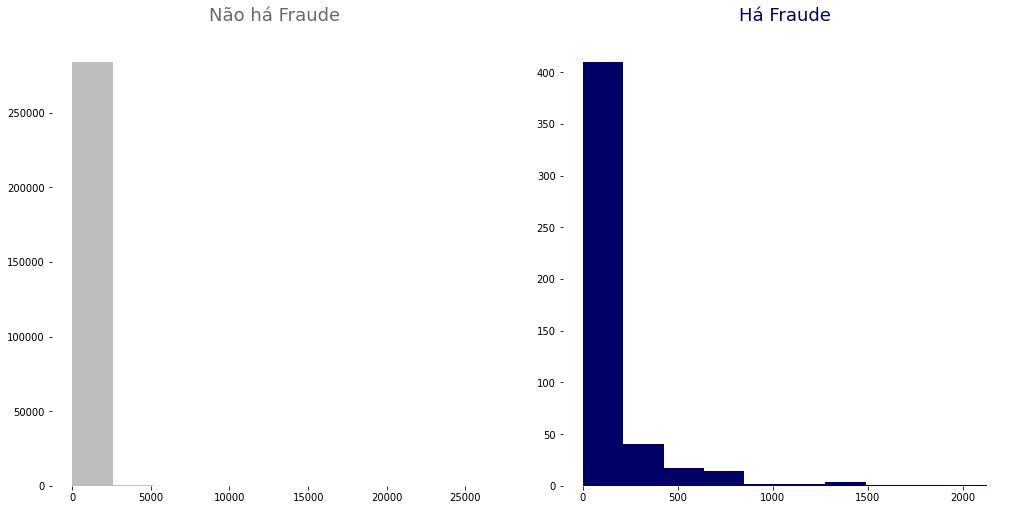

In [10]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável Amount quando não há fraude
ax[0].hist(df['Amount'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável Amount quando não há fraude
ax[1].hist(df['Amount'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})

#plotando o gráfico
plt.tight_layout(pad=4.0);

texto sobre o histograma acima

### Avaliando o boxplot da varíavel Amount

explicar o interesse apenas nos dados que se referem a fraude

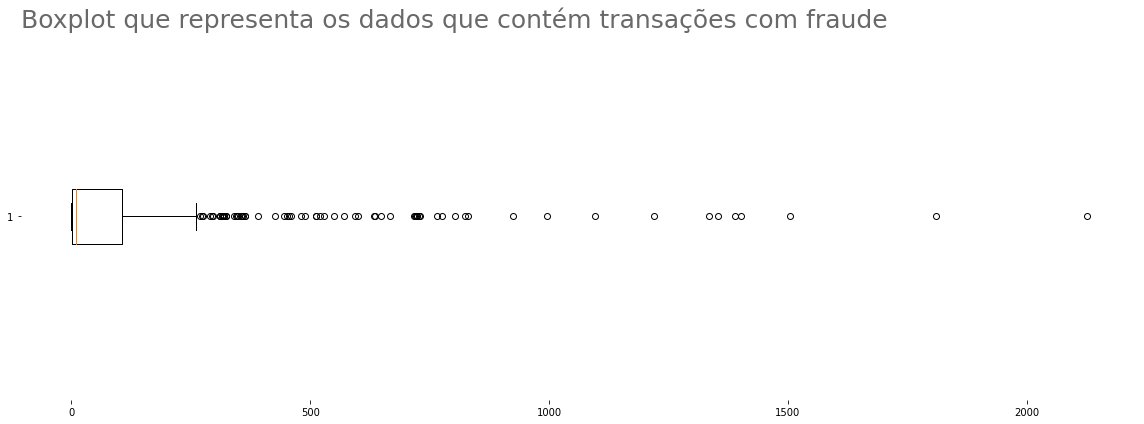

In [11]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(16,6))

#criando o boxplot
ax.boxplot(df['Amount'][df.Class ==1],vert=False)

#melhorando o layout
ax.set_frame_on(False)
ax.set_title('Boxplot que representa os dados que contém transações com fraude',loc='left',color='dimgrey',fontdict={'fontsize':25})


#plotando o gráfico
plt.tight_layout();


In [12]:
#verificando os dados estatisticos
primeiro_quartil = df['Amount'].quantile(0.25)
terceiro_quartil = df['Amount'].quantile(0.75)
intervalo_interquartilico = terceiro_quartil - primeiro_quartil
maximo = terceiro_quartil + (1.5*intervalo_interquartilico)

#contabilizando a quantidade de outliers em comparação ao total de dados
porcentagem = df[df['Amount'] > maximo].shape[0] / df.shape[0]
print('Dentre os dados com fraude, aproximadamente {:.0f}% são considerados como outliers'.format(porcentagem*100))

Dentre os dados com fraude, aproximadamente 11% são considerados como outliers


texto explicando o boxplot e a quantidade de outliers

In [42]:
#avaliando qual o valor médio nas fraudes




### Matriz de Correlação

In [13]:
#criando a matriz de correlacao

#plotando a matriz de correlacao

explicar  am matriz

## Preparação dos Dados para os modelos de Machine Learning

falar que os dados de amount  e time ainda não foram normalizados e vc vai utilziar o standard scaler

In [14]:
#inicialização do normalizador de dados
scaler = StandardScaler().fit(df[['Time','Amount']])

#substituir os dados antigos para dados normalizados
df[['Time','Amount']] = scaler.transform(df[['Time','Amount']])

falar em dividir o conjuntos de dados entre treino e validação

In [15]:
#separar as variáveis x e y
x = df.drop('Class',axis=1)
y=df.Class

#divindo o dataset em dados de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

comentar que já foi visto que os dados não estão balanceados e balancear

explicar undersampling e over sampling

In [17]:
#usando uma técnica de undersampling -> elimina aleatoriamente entrada da classe com maior número de ocorrências
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_sample(x_train,y_train)

#### Visualizando a Distribuição dos Dados balanceados

In [37]:
#funcao feita para colocar o rotulo de dados em balanceados
def addlabels_balanceados(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 15,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

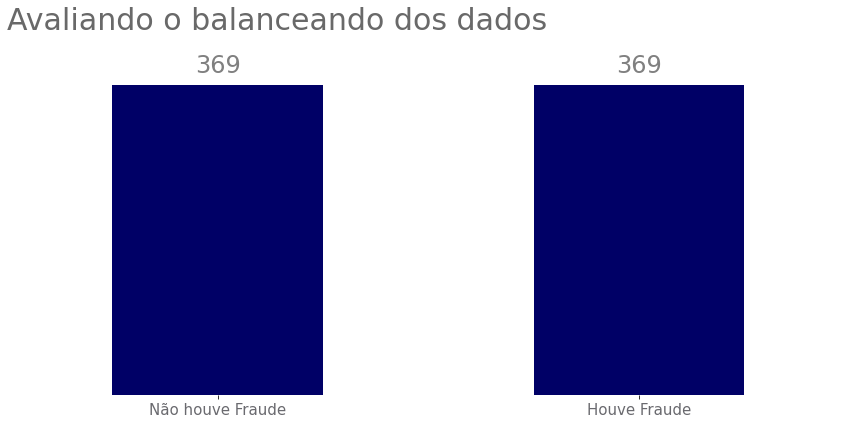

In [39]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,6))

#pegando a contagem de valores da variável Class
pd.Series(y_rus).value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando o balanceando dos dados',loc='left',pad=40,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels_balanceados(y_rus,pd.Series(y_rus).value_counts())


#plotando o gráfico
plt.tight_layout();

## Modelos de Machine Learning

* explicar o que é um modelo supervisionado
* Explicar o que é um modelo de classificação
* explicar as métricas do classification_report
* explicar matriz de confusão

### Regressão Logística

explicar regressão logística

In [52]:
#instanciando o modelo
lr = LogisticRegression()

#realizando o treinamento do modelo
lr.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_lr = lr.predict(x_test)
y_proba_lr = lr.predict_proba(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_lr,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.91      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.96      0.98     71202



#### Matriz de Confusão

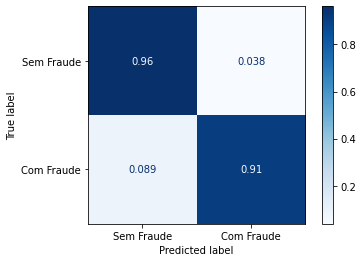

In [83]:
plot_confusion_matrix(lr,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

### Random Forest


explicar random forest

In [40]:
#instanciando o modelo
lr = LogisticRegression()

#realizando o treinamento do modelo
lr.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_lr = lr.predict(x_test)
y_proba_lr = lr.predict_proba(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_lr,digits=2))

### Decision Tree

explicar o que é decision tree

In [87]:
#instanciando o modelo
dtc = DecisionTreeClassifier()

#realizando o treinamento do modelo
dtc.fit(x_rus,y_rus)

#fazer as previsoes em cima dos dados de teste
y_pred_dtc = dtc.predict(x_test)
y_proba_dtc = dtc.predict_proba(x_test)

#imprimir relatorio de classificação
print('Relatório de Classificação:\n',classification_report(y_test,y_pred_dtc,digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     71079
           1       0.01      0.90      0.03       123

    accuracy                           0.89     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.89      0.94     71202



#### Matriz de Confusão

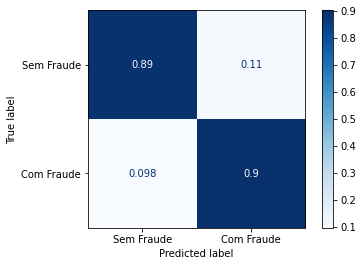

In [88]:
plot_confusion_matrix(dtc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

#### Plotando a árvore de decisão

explicar este plot

In [118]:
#ajustando a Classe para melhor visualização  arrumar este erro
df.Class.replace(to_replace=['Normal','Fraude'],value=[0,1],inplace=True)

TypeError: ignored

In [119]:
df.Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

TypeError: ignored

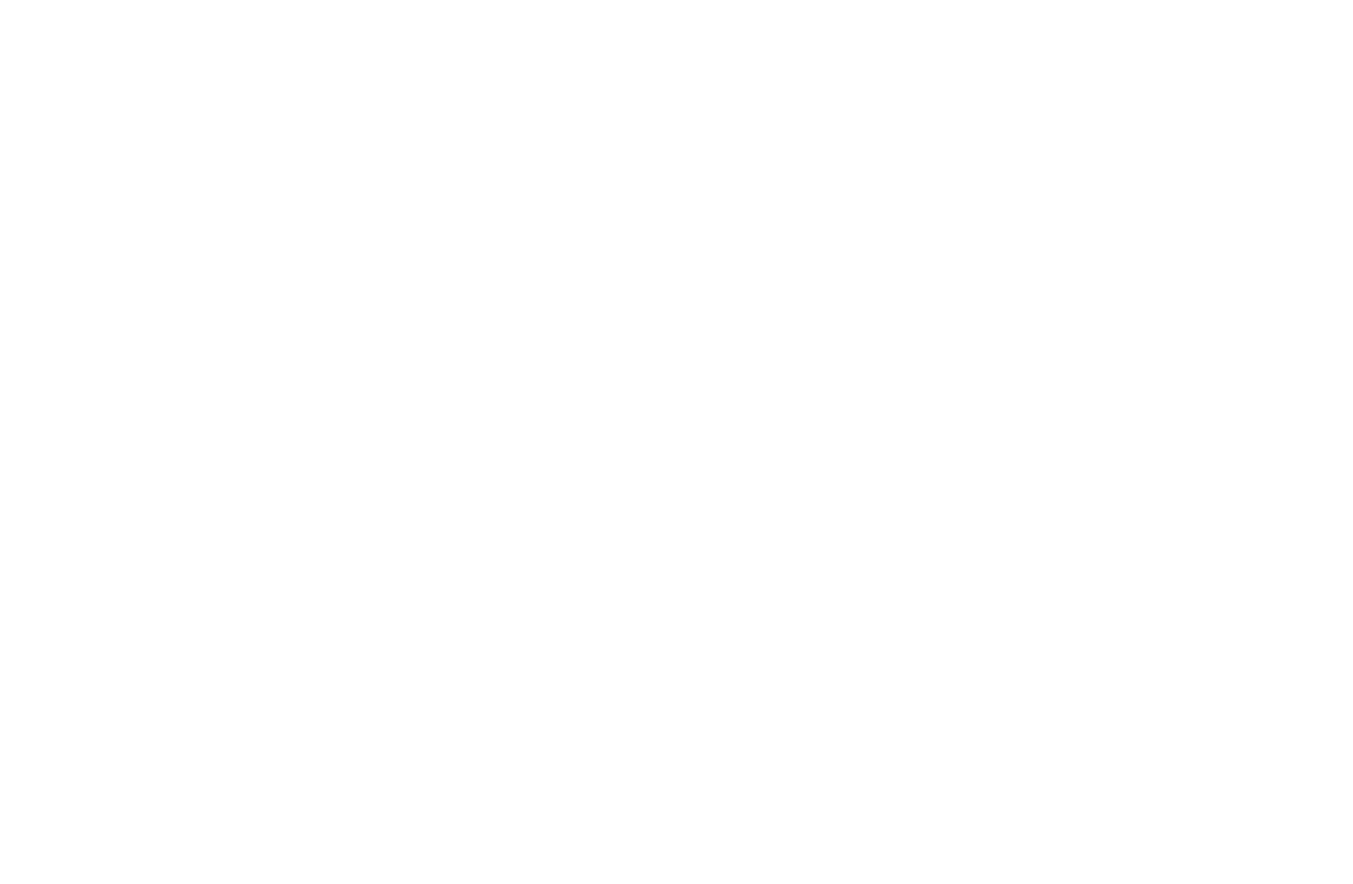

In [116]:
fig= plt.figure(figsize=(24,16))
ax = plot_tree(dtc,filled=True,class_names=df.Class);  #colocar class_names == igual df.Class

### SVM

xxxx

In [ ]:
#modelo svm <- classificacao

#### Matriz de Confusão

## Avaliando o desempenho do modelos

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [16]:
# https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/ dar uma olha na parte que ele faz o relatório de classificaçaõ
# o que é auc?

## Conclusões

* Escrever suas conclusões a respeito da construção do modelo